In [487]:
# import sys
# reload(sys)
# sys.setdefaultencoding("utf-8")

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'


In [488]:
paths = [
    'https://raw.githubusercontent.com/ericfischer/housing-inventory/master/craigslist-2003',
    'https://raw.githubusercontent.com/ericfischer/housing-inventory/master/craigslist-2004',
    'https://raw.githubusercontent.com/ericfischer/housing-inventory/master/craigslist-2005',
    'https://raw.githubusercontent.com/ericfischer/housing-inventory/master/craigslist-2006',
    'https://raw.githubusercontent.com/ericfischer/housing-inventory/master/craigslist-2007',
    'https://raw.githubusercontent.com/ericfischer/housing-inventory/master/craigslist-2008',
    'https://raw.githubusercontent.com/ericfischer/housing-inventory/master/craigslist-2009',
    'https://raw.githubusercontent.com/ericfischer/housing-inventory/master/craigslist-2010',
    'https://raw.githubusercontent.com/ericfischer/housing-inventory/master/craigslist-2011',
    'https://raw.githubusercontent.com/ericfischer/housing-inventory/master/craigslist-2012',
    'https://raw.githubusercontent.com/ericfischer/housing-inventory/master/craigslist-2013',
    'https://raw.githubusercontent.com/ericfischer/housing-inventory/master/craigslist-2014',
    'https://raw.githubusercontent.com/ericfischer/housing-inventory/master/craigslist-2015',
    'https://raw.githubusercontent.com/ericfischer/housing-inventory/master/craigslist-2016']

# list of paths where our data is located

In [489]:
import requests
listings = []
for i in paths:
    listings.append(requests.get(i).text)   # create listings from raw data

In [490]:
rentals_pre2012 = {}   # create the pre2012 data
a = 2003
for rents in listings:    #iterate through each year up until 2012
    if a == 2012:
        break
    rents = rents.split('\n')   #split on new line, separate listings
    rentals_pre2012[a] = []
    for rent in rents:
        rent = rent.lstrip()
        rent = rent.rstrip()
        if rent.startswith('$') == True:
            rentals_pre2012[a].append(rent)
    a = a + 1    # create listings for every year
    
for i in rentals_pre2012:
    print i, 'count:', len(rentals_pre2012[i])
    
    # count how many listings with a dollar sign in the listings for pre 2012

2003 count: 497
2004 count: 6434
2005 count: 15456
2006 count: 4530
2007 count: 890
2008 count: 487
2009 count: 195
2010 count: 99
2011 count: 1486


In [491]:
# count how many listings with a dollar sign in the listings for post 2012
a = 2012
rentals_post2012 = {}
for rents in listings[9:]:
    rents = rents.split('\n')
    rentals_post2012[a] = []
    for rent in rents:
        rent = rent.lstrip()
        rent = rent.rstrip()
        if '$' in rent:
            rentals_post2012[a].append(rent)
    a = a + 1

for i in rentals_post2012:
    print i, 'count:', len(rentals_post2012[i])

2016 count: 2499
2012 count: 2289
2013 count: 782
2014 count: 2230
2015 count: 2035


In [492]:
year = []
post = []
for yr in rentals_pre2012:
    print yr
    for i in rentals_pre2012[yr]:
        year.append(yr)
        post.append(i.lower())
for yr in rentals_post2012:
    print yr
    for i in rentals_post2012[yr]:
        year.append(yr)
        post.append(i.lower())

2003
2004
2005
2006
2007
2008
2009
2010
2011
2016
2012
2013
2014
2015


In [493]:
posts = pd.DataFrame({'year':year,'post':post})

In [494]:
posts.head()

,post,year
0,$950 / 1br - sunny one bedroom for rent (sunse...,2003
1,$1500 / 2br - 1 ba cow hollow ***open house th...,2003
2,$1795 / 2br - spacious & completely remodeled ...,2003
3,$1180 / 0br - victorian hotel room w/private b...,2003
4,$1100 / 1br - great landlord-great tenats (inn...,2003


In [495]:
import re
posts['price'] = posts.post.apply(lambda x: (re.findall('\${1}[,0-9]{1,10}',x)))

In [496]:
posts['bed'] = posts.post.apply(lambda x: re.findall('[,0-9]br',x))

In [497]:
posts.price

0                [$950]
1               [$1500]
2               [$1795]
3               [$1180]
4               [$1100]
5               [$1851]
6               [$2100]
7               [$1550]
8               [$2495]
9               [$1995]
10              [$1700]
11               [$900]
12              [$1895]
13              [$1695]
14               [$975]
15              [$2350]
16              [$1600]
17               [$950]
18               [$825]
19              [$2800]
20              [$1050]
21              [$1395]
22              [$1400]
23              [$1450]
24              [$1150]
25              [$1350]
26              [$2650]
27              [$1050]
28              [$1450]
29              [$2250]
              ...      
39879           [$4850]
39880           [$1600]
39881           [$4000]
39882           [$1925]
39883           [$4967]
39884          [$10800]
39885           [$3750]
39886           [$2800]
39887           [$2395]
39888           [$2950]
39889           

In [498]:
# run once
def un_nest(nested):
    for i in nested:
        return i

posts.price = posts.price.apply(lambda x: un_nest(x))

In [499]:
posts.price = posts.price.apply(lambda x: str(x).replace('$',''))
posts.price = posts.price.apply(lambda x: str(x).replace(',',''))                          
posts.price = posts.price.apply(lambda x: float(x) if x != 'None' else np.nan)

In [500]:
# run once
def un_nest(nested):
    for i in nested:
        for i in i:
            return i
posts.bed = posts.bed.apply(lambda x: un_nest(x))
posts.bed = posts.bed.apply(lambda x: 0 if x == None or x == ',' else x)
posts.bed = posts.bed.apply(lambda x: int(x))

In [501]:
posts

,post,year,price,bed
0,$950 / 1br - sunny one bedroom for rent (sunse...,2003,950.0,1
1,$1500 / 2br - 1 ba cow hollow ***open house th...,2003,1500.0,2
2,$1795 / 2br - spacious & completely remodeled ...,2003,1795.0,2
3,$1180 / 0br - victorian hotel room w/private b...,2003,1180.0,0
4,$1100 / 1br - great landlord-great tenats (inn...,2003,1100.0,1
5,$1851 / 3br - eduardian flat 2 fpl. sec pkg nu...,2003,1851.0,3
6,"$2100 / 2br - spacious 2br/1ba, hdwd flrs, bay...",2003,2100.0,2
7,$1550 / 2br - inner sunset 9th ave. 2br/1ba ne...,2003,1550.0,2
8,$2495 / 3br - newly remodeled top floor apt w/...,2003,2495.0,3
9,"$1995 / 3br - **great price,trendy 16th&valenc...",2003,1995.0,3


In [504]:
# remove alpha numeric characters from the description
#posts.post = posts.post.apply(lambda x: x.encode('UTF8'))

            
posts.post = posts.post.apply(lambda x: re.sub(r'([^\s\w]|_)+', '', str(x)))

In [507]:
posts.post

0        950  1br  sunny one bedroom for rent sunset  p...
1        1500  2br  1 ba cow hollow open house thursday...
2        1795  2br  spacious  completely remodeled 2 bd...
3        1180  0br  victorian hotel room wprivate bath ...
4        1100  1br  great landlordgreat tenats inner ri...
5        1851  3br  eduardian flat 2 fpl sec pkg nu hdw...
6        2100  2br  spacious 2br1ba hdwd flrs bay windo...
7        1550  2br  inner sunset 9th ave 2br1ba near th...
8        2495  3br  newly remodeled top floor apt wview...
9        1995  3br  great pricetrendy 16thvalencia loca...
10       1700  2br  upper level flat parking ocean view...
11       900  0br  compact studio apt corner 39th ave  ...
12       1895  2br  panoramic view 2 br noe valley flat...
13       1695  2br  lux new 2 story condo open wed dec ...
14       975  0br  nice large studiosee it now  lower n...
15       2350  2br  sunny trilevel with gorgeous cherry...
16       1600  2br  2 bdrm apartment for rent utilities.

In [508]:
# -*- coding: utf-8 -*-
import Levenshtein

from nltk.util import ngrams

districts_set = ['inner richmond','lower nob hill','inner' 'japantown', 'glen park', 'western addition', 'outer richmond', 'inner sunset', 
'financial district', 'south beach', 'oceanview', 'merced', 'ingleside', 'presidio heights', 'bernal heights', 'golden gate park', 
'south of market','portola', 'potrero hill', 'treasure island', 'pacific heights', 'hayes valley', 'excelsior', 'visitacion valley', 'mission bay', 
 'castro', 'upper market', 'sunset', 'parkside', 'mclaren park', 'nob hill', 'lakeshore', 'west of twin peaks', 'chinatown', 'noe valley', 
 'north beach', 'marina', 'haight ashbury', 'lincoln park', 'bayview hunters point', 'seacliff', 'lone mountain', 'usf', 'presidio', 'mission', 
 'tenderloin', 'russian hill', 'outer mission', 'twin peaks','mission district','downtown','usf','panhandle','UCSF','SOMA','lower haight','panhandle'
  'SFSU']


def district_match(source):
    
    candidates = []
    
    for district in districts_set:
        
        gram_length = len(district.split())
        ratio_threashold = .5
        
        if gram_length > 1:
            grams = ngrams(source.split(), gram_length)

            for gram in grams:
                gram_combined =  str(" ".join(gram))
                ratio = Levenshtein.ratio(district, gram_combined)
                
                if ratio > ratio_threashold:
#                     print "Target word: %s, matches district: %s, ngram-len: %d, score: %f" % (gram_combined, district, gram_length, ratio)
                    candidates.append((ratio, district))
                
        else:
            
            for word in source.split():
            
                ratio = Levenshtein.ratio(district, str(word))
                
                if ratio > ratio_threashold:
#                     print "Target word: %s, matches district: %s " % (word, district)
                    candidates.append((ratio, district))
                else:
                    _ = ""
#                     print word, "doesn't match.. .6 ratio is:", ratio
                
    return sorted(candidates)[::-1]



In [509]:
# create data matches


district1 = []
district2 = []
post_descrip = []
counter_yes_match = 0
counter_no_match = 0
for post in posts.post:


    matches = district_match(post.encode('utf8'))
    if len(matches) > 1:   # if the length of matches is > 1
        #print "------------"
        #print post

        if (matches[0][1]) in post:  
            _ = ''
            # print post
            # print matches[0][1]
            counter_yes_match = counter_yes_match + 1


            post = post.lower()
            district1.append(matches[0][1])   #append district
            district2.append(matches[1][1])

        else:
            counter_no_match = counter_no_match + 1
            district1.append(np.nan)
            district2.append(np.nan)
    else:
        district1.append(np.nan)
        district2.append(np.nan)


print a
print 'how many matched:' , counter_yes_match
print 'mismatch:' , counter_no_match

2017
how many matched: 35680
mismatch: 3847


In [510]:
print len(district1) , len(district2)

39909 39909


In [511]:
posts['district1'] = district1
posts['district2'] = district2

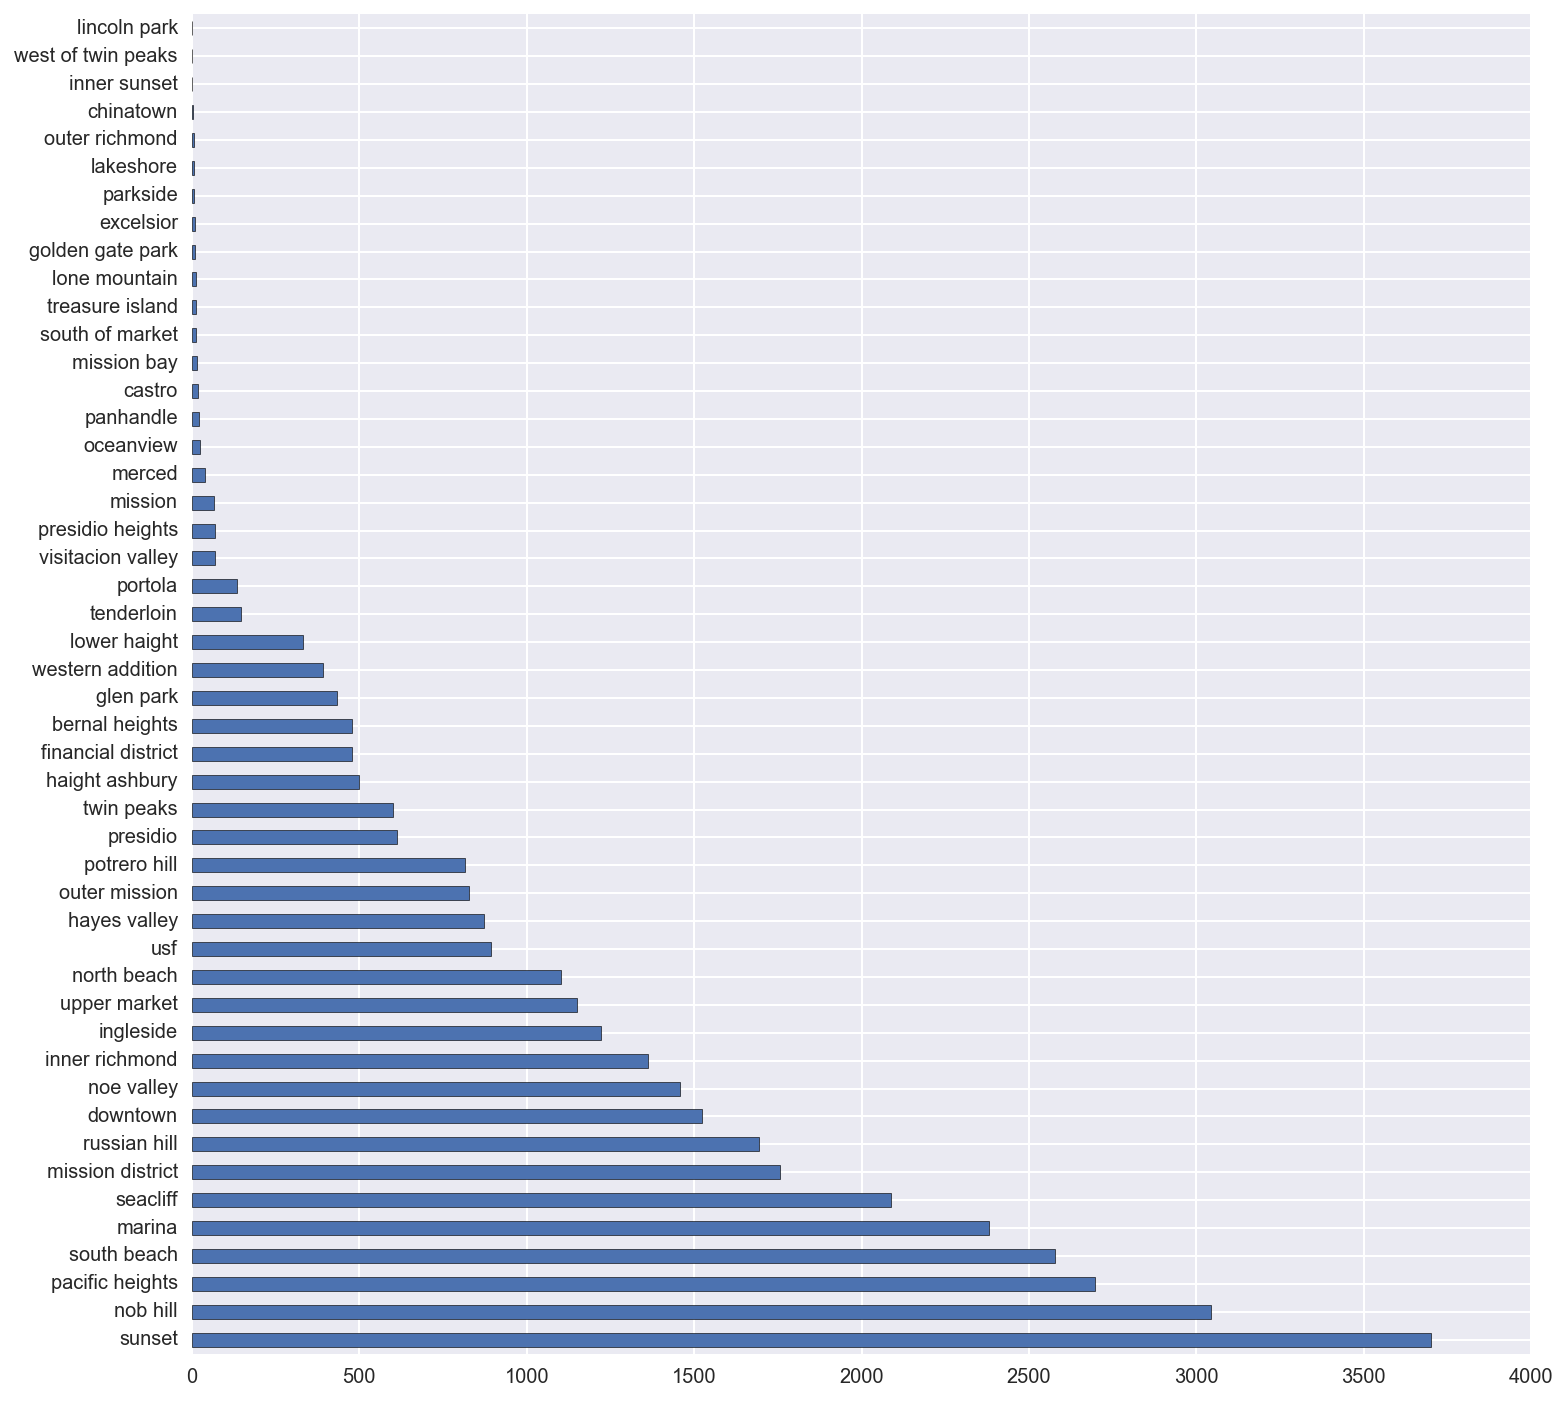

In [512]:
sns.set(rc={"figure.figsize": (12, 12)})
posts.district1.value_counts().plot(kind='barh')

In [513]:
posts.price.apply(lambda x: np.nan if x == 0 else x)

0          950.0
1         1500.0
2         1795.0
3         1180.0
4         1100.0
5         1851.0
6         2100.0
7         1550.0
8         2495.0
9         1995.0
10        1700.0
11         900.0
12        1895.0
13        1695.0
14         975.0
15        2350.0
16        1600.0
17         950.0
18         825.0
19        2800.0
20        1050.0
21        1395.0
22        1400.0
23        1450.0
24        1150.0
25        1350.0
26        2650.0
27        1050.0
28        1450.0
29        2250.0
          ...   
39879     4850.0
39880     1600.0
39881     4000.0
39882     1925.0
39883     4967.0
39884    10800.0
39885     3750.0
39886     2800.0
39887     2395.0
39888     2950.0
39889     3156.0
39890     4000.0
39891     2095.0
39892     2825.0
39893     6000.0
39894     2900.0
39895     4250.0
39896     8000.0
39897     2275.0
39898     3300.0
39899     3400.0
39900     4750.0
39901     6759.0
39902     3795.0
39903     4495.0
39904     1695.0
39905     1750.0
39906     3900

In [544]:
posts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39909 entries, 0 to 39908
Data columns (total 6 columns):
post         39909 non-null object
year         39909 non-null int64
price        39833 non-null float64
bed          39909 non-null int64
district1    35680 non-null object
district2    35680 non-null object
dtypes: float64(1), int64(2), object(3)
memory usage: 1.8+ MB


In [515]:
posts.bed.value_counts()

1    13521
2    12516
0     7541
3     4815
4     1202
5      257
6       33
7       22
8        2
Name: bed, dtype: int64

In [521]:
posts.post[20]

'1050  1br  spacious sunny sunset apt photos sunset  parkside'

In [532]:
train = pd.read_csv('./train.csv')

In [537]:
train.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541


In [546]:
train.Address

# look up addresses to districts then merge on that

0                    OAK ST / LAGUNA ST
1                    OAK ST / LAGUNA ST
2             VANNESS AV / GREENWICH ST
3              1500 Block of LOMBARD ST
4             100 Block of BRODERICK ST
5                   0 Block of TEDDY AV
6                   AVALON AV / PERU AV
7              KIRKWOOD AV / DONAHUE ST
8                  600 Block of 47TH AV
9         JEFFERSON ST / LEAVENWORTH ST
10        JEFFERSON ST / LEAVENWORTH ST
11                0 Block of ESCOLTA WY
12                   TURK ST / JONES ST
13               FILLMORE ST / GEARY BL
14             200 Block of WILLIAMS AV
15                0 Block of MENDELL ST
16                   EDDY ST / JONES ST
17               GODEUS ST / MISSION ST
18               MENDELL ST / HUDSON AV
19                100 Block of JONES ST
20               200 Block of EVELYN WY
21            1600 Block of VALENCIA ST
22                100 Block of JONES ST
23                100 Block of JONES ST
24             FILLMORE ST / LOMBARD ST


In [547]:
!pip install geopy

    100% |████████████████████████████████| 71kB 1.5MB/s 
You are using pip version 8.1.1, however version 8.1.2 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [558]:
from geopy.geocoders import Nominatim
geolocator = Nominatim()
location = geolocator.reverse("-122.425892","37.774599")
print(location)

ValueError: Must be a coordinate pair or Point

In [567]:
pd.read_csv('/Users/Stav/Downloads/listings 2.csv')

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,1162609,https://www.airbnb.com/rooms/1162609,20151101181058,2015-11-02,Lovely One Bedroom Apartment,This is a big well designed space. Our neighbo...,This is a great one bedroom apartment. It is a...,This is a big well designed space. Our neighbo...,none,NaN,...,9.0,t,NaN,SAN FRANCISCO,f,strict,f,f,1,0.28
1,6032828,https://www.airbnb.com/rooms/6032828,20151101181058,2015-11-01,Historic Seacliff Home,Beautiful charmng multi- bedroom home in prest...,NaN,Beautiful charmng multi- bedroom home in prest...,none,NaN,...,NaN,t,NaN,SAN FRANCISCO,f,flexible,f,f,1,NaN
2,6938818,https://www.airbnb.com/rooms/6938818,20151101181058,2015-11-02,Best Secret in Town,Convenience is the key for your travel. Walkin...,The room is spacious and it is on the top leve...,Convenience is the key for your travel. Walkin...,none,It is in the city and close to everything. Par...,...,9.0,t,S. F. Short-Term Residential Rental Registrati...,SAN FRANCISCO,f,strict,f,f,1,2.33
3,8087607,https://www.airbnb.com/rooms/8087607,20151101181058,2015-11-02,Single Room Beautiful Beach Condo,"When I travel, my quiet beach side condo makes...",NaN,"When I travel, my quiet beach side condo makes...",none,NaN,...,NaN,t,NaN,SAN FRANCISCO,f,flexible,f,f,1,NaN
4,4781448,https://www.airbnb.com/rooms/4781448,20151101181058,2015-11-02,3 Bd 2.5 Ba Full Flat Condo w Views,Our family-friendly condo is located in San Fr...,"Open concept living, dining area has great cit...",Our family-friendly condo is located in San Fr...,none,We are located across the street from Lincoln ...,...,10.0,t,NaN,SAN FRANCISCO,t,strict,f,f,1,0.36
5,1931937,https://www.airbnb.com/rooms/1931937,20151101181058,2015-11-02,Blocks from GG Park & Ocean Beach,Large 2BD apt with back yard and ocean view. F...,Full kitchen and appliances Back yard Bathroom...,Large 2BD apt with back yard and ocean view. F...,none,"Surrounded by nature, with access to parks, hi...",...,9.0,t,NaN,SAN FRANCISCO,f,moderate,f,f,2,1.13
6,2134100,https://www.airbnb.com/rooms/2134100,20151101181058,2015-11-02,Ocean Beach hilltop cottage,Newly built cottage that comfortably sleeps 2....,Amazing ocean views with a private brand new b...,Newly built cottage that comfortably sleeps 2....,none,Quiet neighborhood that is half a block from ...,...,9.0,t,NaN,SAN FRANCISCO,f,moderate,f,f,1,6.09
7,4688930,https://www.airbnb.com/rooms/4688930,20151101181058,2015-11-02,Modern remodel + period charm,A view of the Golden Gate Bridge across Lincol...,Remodeled 1 bedroom + nursery + optional attic...,A view of the Golden Gate Bridge across Lincol...,none,"Aside from being 20 minutes from Downtown, thi...",...,10.0,t,NaN,SAN FRANCISCO,f,moderate,f,f,1,0.18
8,2316478,https://www.airbnb.com/rooms/2316478,20151101181058,2015-11-02,2+BR Beach Cottage-w/Parking+Views,Experience the comforts of a beach house in SF...,This is a unique opportunity to stay with the ...,Experience the comforts of a beach house in SF...,none,- Ocean Beach 2 blocks away with excellent sur...,...,9.0,t,NaN,SAN FRANCISCO,f,moderate,t,t,3,4.95
9,3168359,https://www.airbnb.com/rooms/3168359,20151101181058,2015-11-02,Charming & Private Ideal location,NaN,"Spacious, quiet and beautifully decorated, thi...","Spacious, quiet and beautifully decorated, thi...",none,"A favorite spot for both tourists and locals, ...",...,9.0,t,NaN,SAN FRANCISCO,f,strict,f,f,2,3.94
